In [31]:
%matplotlib inline
from src.generation_c import data_generator_curriculum, data_generator_gradual
from src.models import get_model_simple_lstm
from src.utils import draw_arc_diagram

In [32]:
CASE = 'internal'
BATCH_SIZE = 32
N_EPOCHS = 20
STEPS_PER_EPOCHS = 10
MIN_COMPLEXITY = 25
MAX_COMPLEXITY = 30
COMPLEXITY_EVAL = 35
SWICH_STEPS = 1000
EVAL_SET_SIZE = 1000
N_CORES = 8

In [33]:
from src import generation_c
generation_c.init(CASE)

In [34]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [35]:
import pickle

### Model setup

In [36]:
model = get_model_simple_lstm()

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, None, 2048)        8429568   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 36)                73764     
_________________________________________________________________
activation_2 (Activation)    (None, 36)                0         
Total params: 8,503,332
Trainable params: 8,503,332
Non-trainable params: 0
_________________________________________________________________


### Data setup

In [38]:
datagen = data_generator_curriculum(min_complexity=MIN_COMPLEXITY, max_complexity=MAX_COMPLEXITY,
                                    switch_steps=SWICH_STEPS, n_cores=N_CORES)

Process ForkPoolWorker-22:
Process ForkPoolWorker-21:
Process ForkPoolWorker-23:
Process ForkPoolWorker-17:
Process ForkPoolWorker-20:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Traceback (most recent call last):
Process ForkPoolWorker-24:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", lin

In [39]:
datagen_eval = data_generator_curriculum(min_complexity=COMPLEXITY_EVAL, max_complexity=COMPLEXITY_EVAL+1, 
                                         switch_steps=SWICH_STEPS, n_cores=N_CORES)


Process ForkPoolWorker-28:
Process ForkPoolWorker-29:
Process ForkPoolWorker-26:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-27:
Process ForkPoolWorker-25:
Process ForkPoolWorker-31:
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-32:
Process ForkPoolWorker-30:
Traceback (most recent call last):
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/h

In [40]:
%%time
X_eval, y_eval = datagen_eval.generate_data(EVAL_SET_SIZE)

CPU times: user 92.2 ms, sys: 12.6 ms, total: 105 ms
Wall time: 687 ms


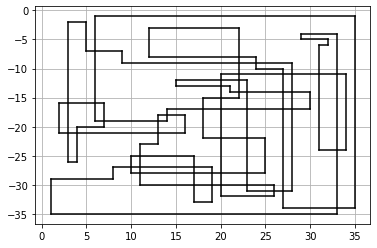

In [41]:
draw_arc_diagram(X_eval[0][:,:2].transpose()) #diagram example

### Model training

In [42]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [43]:
checkpoint = ModelCheckpoint('tmp.h5', monitor='val_accuracy', save_best_only=True)
lr_reduce = ReduceLROnPlateau(factor=0.8, min_lr=1e-5)

In [44]:
model.fit_generator(datagen.stream(BATCH_SIZE), steps_per_epoch=STEPS_PER_EPOCHS, epochs=N_EPOCHS, 
                    validation_data=(X_eval, y_eval),
                    callbacks=[
                        checkpoint,
                        lr_reduce])

/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 19s 2s/step - loss: 3.6460 - accuracy: 0.0531 - val_loss: 3.6790 - val_accuracy: 0.0320
Epoch 2/20
10/10 [==============================] - 15s 2s/step - loss: 3.6532 - accuracy: 0.0312 - val_loss: 3.6567 - val_accuracy: 0.0200
Epoch 3/20
10/10 [==============================] - 15s 2s/step - loss: 3.6471 - accuracy: 0.0312 - val_loss: 3.6349 - val_accuracy: 0.0270
Epoch 4/20
10/10 [==============================] - 14s 2s/step - loss: 3.5645 - accuracy: 0.0375 - val_loss: 3.6217 - val_accuracy: 0.0290
Epoch 5/20
10/10 [==============================] - 14s 2s/step - loss: 3.6051 - accuracy: 0.0437 - val_loss: 3.5809 - val_accuracy: 0.0390
Epoch 6/20
10/10 [==============================] - 14s 1s/step - loss: 3.5931 - accuracy: 0.0250 - val_loss: 3.5815 - val_accuracy: 0.0320
Epoch 7/20
10/10 [==============================] - 14s 1s/step - loss: 3.5959 - accuracy: 0.0344 - val_loss: 3.5726 - val_accuracy: 0.0330
Epoch 8/20
10/10 [==

### Model learning curve

In [48]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 30})

In [49]:
#plt.style.use('grayscale')

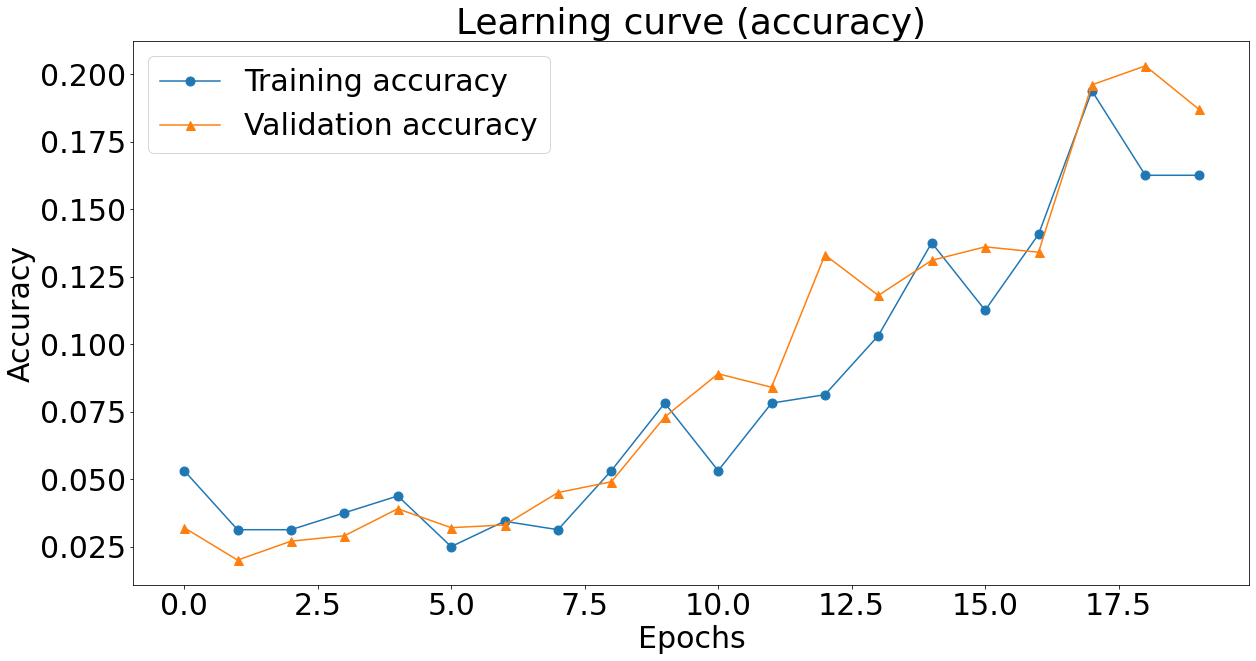

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Learning curve (accuracy)')
plt.plot(model.history.history['accuracy'], marker='o', markersize=9)
plt.plot(model.history.history['val_accuracy'], marker='^', markersize=9)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend([
           'Training accuracy',
           'Validation accuracy',
           ], loc='best')

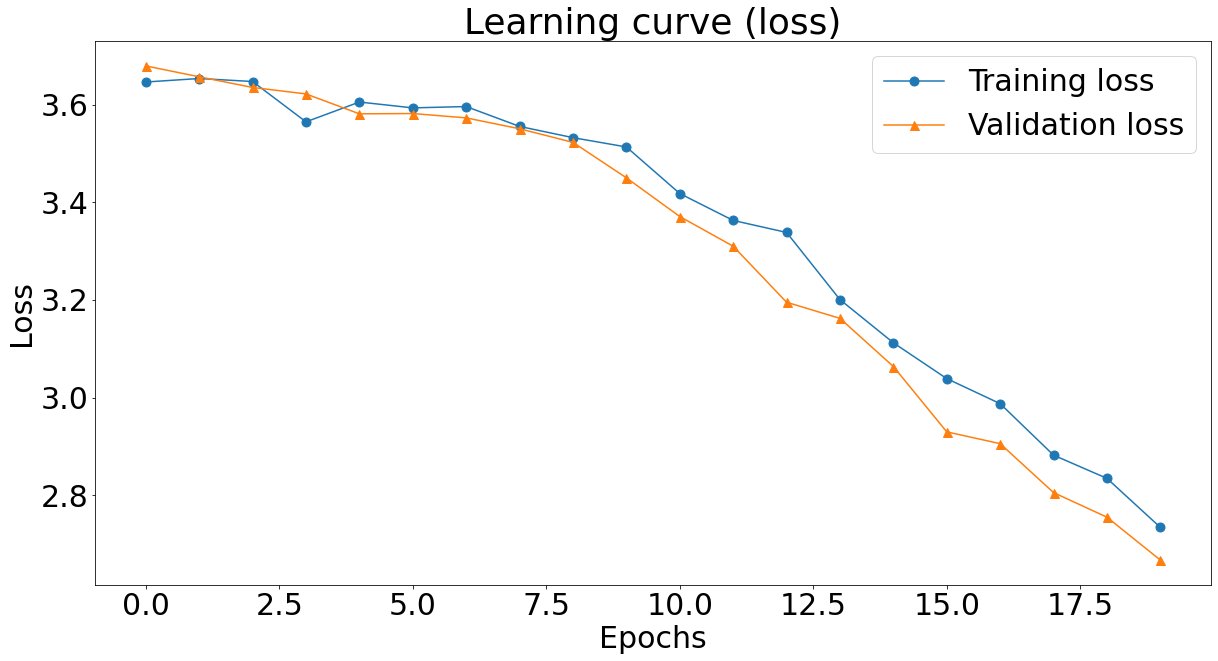

In [52]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Learning curve (loss)')
plt.plot(model.history.history['loss'], marker='o', markersize=9)
plt.plot(model.history.history['val_loss'], marker='^', markersize=9)
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend([
           'Training loss',
           'Validation loss',        
           ], loc='best')


### Validation set prediction assessment

In [53]:
preds = model.predict(X_eval)

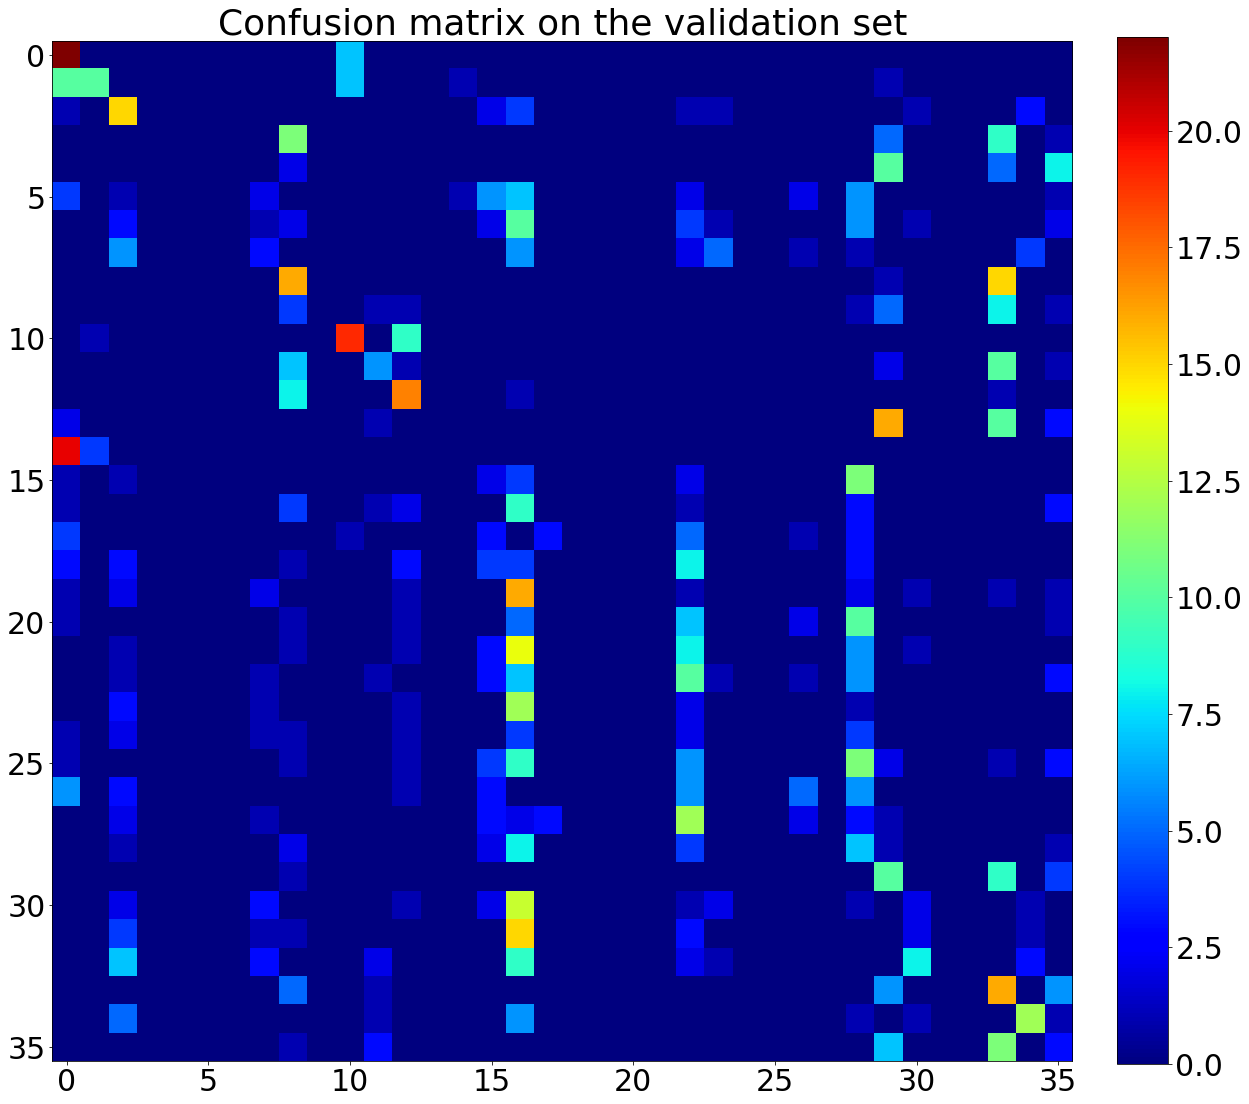

In [56]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Confusion matrix on the validation set')
pos = ax.imshow(confusion_matrix(y_eval.argmax(1), preds.argmax(1)), cmap='jet')
plt.colorbar(pos, ax=ax, fraction=0.046, pad=0.04)
#plt.savefig('confusion_internal.png', dpi=300)

In [57]:
print(classification_report(y_eval.argmax(1), preds.argmax(1)))

              precision    recall  f1-score   support

           0       0.28      0.76      0.41        29
           1       0.67      0.34      0.45        29
           2       0.24      0.54      0.33        28
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00        32
           7       0.16      0.11      0.13        28
           8       0.23      0.50      0.32        32
           9       0.00      0.00      0.00        21
          10       0.56      0.66      0.60        29
          11       0.35      0.22      0.27        27
          12       0.41      0.63      0.50        27
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00        24
          15       0.05      0.10      0.07        21
          16       0.05      0.38      0.10        24
          17       0.50    

/home/nerusskikh/anaconda3/envs/deeplearning/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
